## IMPLEMENTATION OF A MACHINE LEARNING MODEL FOR OPTIMAL RETAIL BUSINESS 

##   ------------------------ PRICE BRANDING IN A COMPETITIVE ENVIRONMENT------------------------

In the fast-paced world of retail, companies are constantly looking for ways to optimize their pricing strategies to maximize revenue and stay competitive in the market. **Pricing** plays a crucial role in determining the demand for products, influencing customer purchase decisions, and positioning a brand against its competitors. To make informed pricing decisions, businesses often rely on historical data and advanced analytics, including **machine learning , to identify trends, understand consumer behavior, and react to competitors' moves**. 

In this notebook, we’ll explore a retail dataset that provides comprehensive information that allows for the **development of a retail price optimization model**. It captures not only the company's internal data (such as **sales, product features, and pricing**) but also competitor pricing and performance metrics, offering a 360-degree view of the market dynamics that can affect demand.

**Features description**

* **customers** (integer) - monthly demand for a given subcategory of goods
* **freight_price** (float) - freight price of the company goods
* **fp1, fp2, fp3** (float) - freight price of competitors 1,2,3 goods respectively
* **product_category_name** - (categorical) - broad group category name
* **product_id** (categorical) - detailed group subcategory name

* **product_description_lenght** (integer) - Number of words in the subcategory description
* **product_score** (float) - user rating for subcategories of the company goods
* **ps1, ps2, ps3** (float) - user rating for subcategories of competitors 1,2,3 respectively
* **product_photos_qty** (integer) - number of photos for each subcategory (product_id)
* **product_weight_g** (integer) - unit weight in grams
* **total_price** (float) - montly revenue which can be calculated using formula: total_price = unit_price * qty

* **month_year** (string) - data in the format (dd-mm-yyyy) within the range between 01-01-2017 and 01-08-2018. Only months and years are important here.
* **year** (integer) - year which was taken from the 'month_year'
* **month** (integer) - month which was taken from the 'month_year'
* **qty** (integer) - monthly sales per subcategory
* **unit_price** (float) - monthly unit price of subcategory good of company goods

* **comp_1, comp_2, comp_3** (float) - unit price of within the subcategory of competitors 1,2,3 goods respectively
* **lag_price** (float) - unit price on the previous month
* **weekend** (integer) - number of weekends per month
* **weekday** (integer) - number of weekdays per month
* **holiday** (integer) - number of holidays per month
* **s** (float) - yet unknown parameter


### **Main Concerns:**
- **Exploratory Data Analysis**: to identify patterns.
- **Data Visualization**: to study price-demand correlation.
- **Price Forecasting**: to forecast the most effective price points.
- **Profit Optimization**: to optimize profit for each product subcategory that maximizes total revenue.

This project highlights the effectiveness of data-driven approaches in informing retail pricing decisions, providing actionable recommendations for improvement.

### Importing Necessary Libraries

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib 
sns.set(style="whitegrid")

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.cluster import KMeans

# Ignoring warnings for cleaner output
import warnings 
warnings.filterwarnings('ignore')

### Loading and Exploring Data

In [63]:
# Loading the dataset
data = pd.read_csv("retail_price.csv")
data.head()

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.95,39,161,2,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.95,39,161,2,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.95,39,161,2,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.95,39,161,2,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.95,39,161,2,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95


In [64]:
# Checking the dimension of the dataset
data.shape

(676, 30)

In [65]:
# Checking the data types and non-null counts of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    object 
 1   product_category_name       676 non-null    object 
 2   month_year                  676 non-null    object 
 3   qty                         676 non-null    int64  
 4   total_price                 676 non-null    float64
 5   freight_price               676 non-null    float64
 6   unit_price                  676 non-null    float64
 7   product_name_lenght         676 non-null    int64  
 8   product_description_lenght  676 non-null    int64  
 9   product_photos_qty          676 non-null    int64  
 10  product_weight_g            676 non-null    int64  
 11  product_score               676 non-null    float64
 12  customers                   676 non-null    int64  
 13  weekday                     676 non

In [66]:
# Providing a statistical summary of numerical columns for insights like min, max, mean, etc.
data.describe()

,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,customers,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
count,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,...,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000
mean,14.495562,1422.708728,20.682270,106.496800,48.720414,767.399408,1.994083,1847.498521,4.085503,81.028107,...,79.452054,4.159467,18.597610,92.930079,4.123521,18.620644,84.182642,4.002071,17.965007,107.399684
std,15.443421,1700.123100,10.081817,76.182972,9.420715,655.205015,1.420473,2274.808483,0.232021,62.055560,...,47.933358,0.121652,9.406537,49.481269,0.207189,6.424174,47.745789,0.233292,5.533256,76.974657
min,1.000000,19.900000,0.000000,19.900000,29.000000,100.000000,1.000000,100.000000,3.300000,1.000000,...,19.900000,3.700000,0.095439,19.900000,3.300000,4.410000,19.900000,3.500000,7.670000,19.850000
25%,4.000000,333.700000,14.761912,53.900000,40.000000,339.000000,1.000000,348.000000,3.900000,34.000000,...,49.910000,4.100000,13.826429,53.900000,4.100000,14.485000,53.785714,3.900000,15.042727,55.668750
50%,10.000000,807.890000,17.518472,89.900000,51.000000,501.000000,1.500000,950.000000,4.100000,62.000000,...,69.900000,4.200000,16.618984,89.990000,4.200000,16.811765,59.900000,4.000000,16.517110,89.900000
75%,18.000000,1887.322500,22.713558,129.990000,57.000000,903.000000,2.000000,1850.000000,4.200000,116.000000,...,104.256549,4.200000,19.732500,117.888889,4.200000,21.665238,99.990000,4.100000,19.447778,129.990000
max,122.000000,12095.000000,79.760000,364.000000,60.000000,3006.000000,8.000000,9750.000000,4.500000,339.000000,...,349.900000,4.500000,57.230000,349.900000,4.400000,57.230000,255.610000,4.400000,57.230000,364.000000


In [67]:
# Checking for missing values to ensure data quality
print("Missing Values ",data.isna().sum().sum())

Missing Values  0


In [68]:
# checking for duplicate values to ensure data quality
print("Duplicated ",data.duplicated().sum().sum())

Duplicated  0


In [69]:
# checking the data types for each feature
data.dtypes

product_id                     object
product_category_name          object
month_year                     object
qty                             int64
total_price                   float64
freight_price                 float64
unit_price                    float64
product_name_lenght             int64
product_description_lenght      int64
product_photos_qty              int64
product_weight_g                int64
product_score                 float64
customers                       int64
weekday                         int64
weekend                         int64
holiday                         int64
month                           int64
year                            int64
s                             float64
volume                          int64
comp_1                        float64
ps1                           float64
fp1                           float64
comp_2                        float64
ps2                           float64
fp2                           float64
comp_3      

### Exploratory Data Analysis

In [70]:
# Ensuring that the date-related columns are in the right format
data['year'] = pd.to_datetime(data['month_year'], format='%d-%m-%Y').dt.year 
data['month'] = pd.to_datetime(data['month_year'], format='%d-%m-%Y').dt.month 
data['month_year'] = pd.to_datetime(data['month_year'], format='%d-%m-%Y').dt.strftime('%Y-%m')

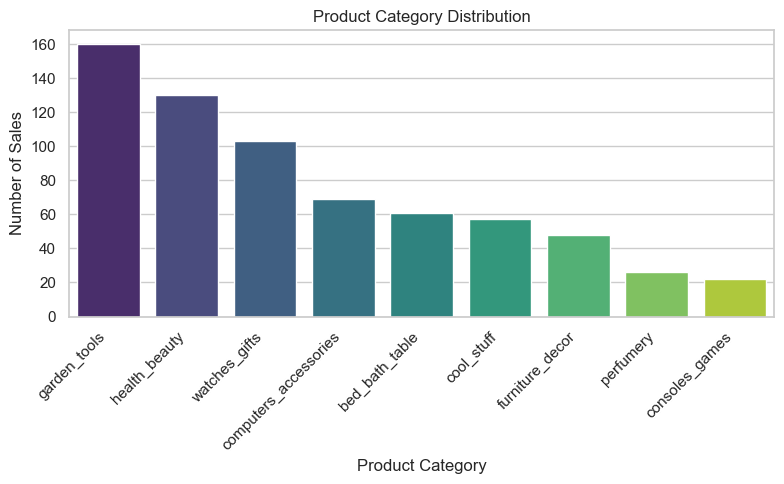

In [71]:
# --- Poduct Category Distribution---

# Counting the occurrences of each product category
category_distribution = data['product_category_name'].value_counts()

# Plotting the category distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=category_distribution.index, y=category_distribution.values, palette='viridis')
plt.title('Product Category Distribution')
plt.xlabel('Product Category')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The barplot shows the distribution of the products across different categories; this shows the number of sales records for each category. 


The **garden_tools, health_beauty, and watches_gifts categories** are the most frequent categories; thay have the highest number of sales records, therefore, they form the bulk of the business.


The **perfumery and consoles_games categories** are those with the lowest number of sales; indicating that they are specialized product. 

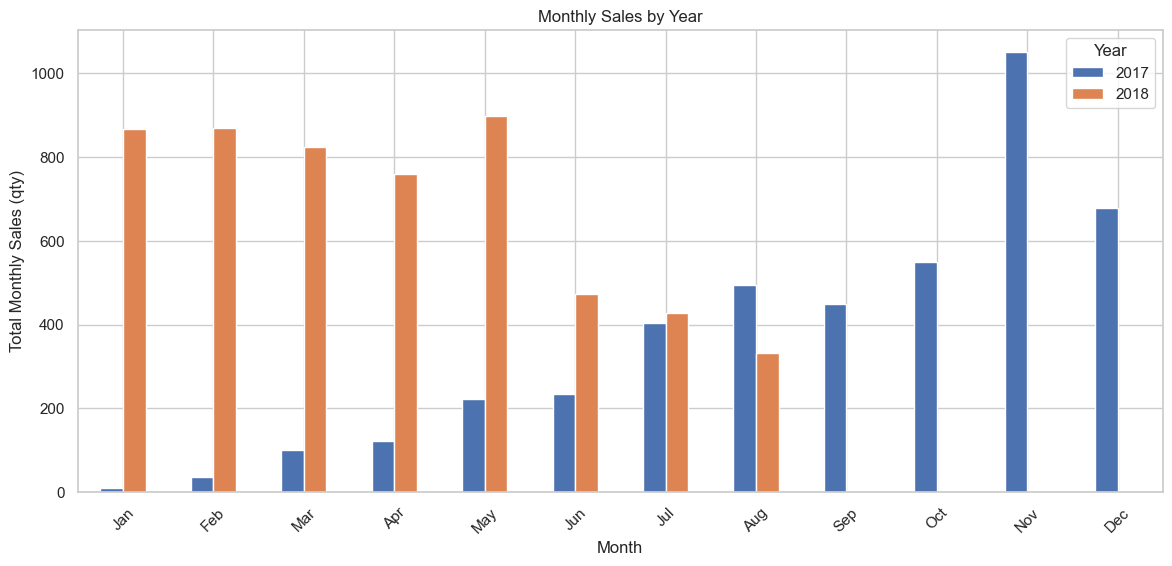

In [72]:
# ---  Seasonality Analysis ---

# Monthly sales analysis
monthly_sales = data.groupby(['year', 'month'])['qty'].sum().reset_index()

# Creating a pivot table for better visualization
monthly_sales_pivot = monthly_sales.pivot(index='month', columns='year', values='qty')

# Plotting the monthly sales
monthly_sales_pivot.plot(kind='bar', figsize=(14, 6))
plt.title('Monthly Sales by Year')
plt.xlabel('Month')
plt.ylabel('Total Monthly Sales (qty)')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                     'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.legend(title='Year')
plt.show()

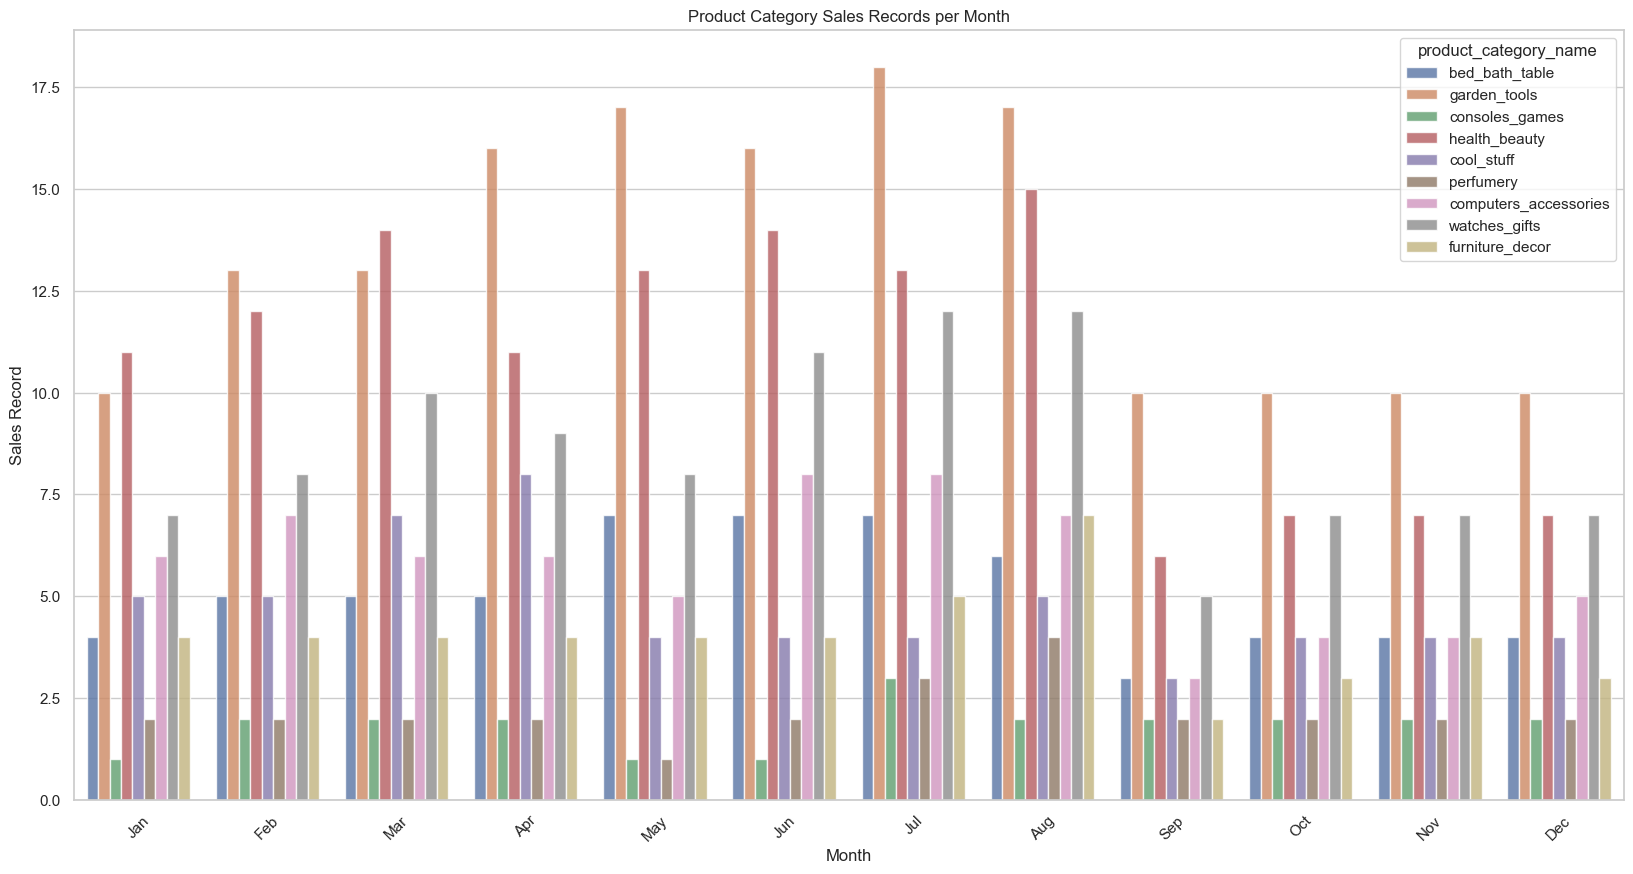

In [73]:
# ---  Seasonality Analysis of Product Categories ---

plt.figure(figsize=(20,10))
sns.countplot(data=data, x='month', hue='product_category_name', alpha=0.8)
plt.title('Product Category Sales Records per Month')
plt.xlabel('Month')
plt.ylabel('Sales Record')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                     'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()

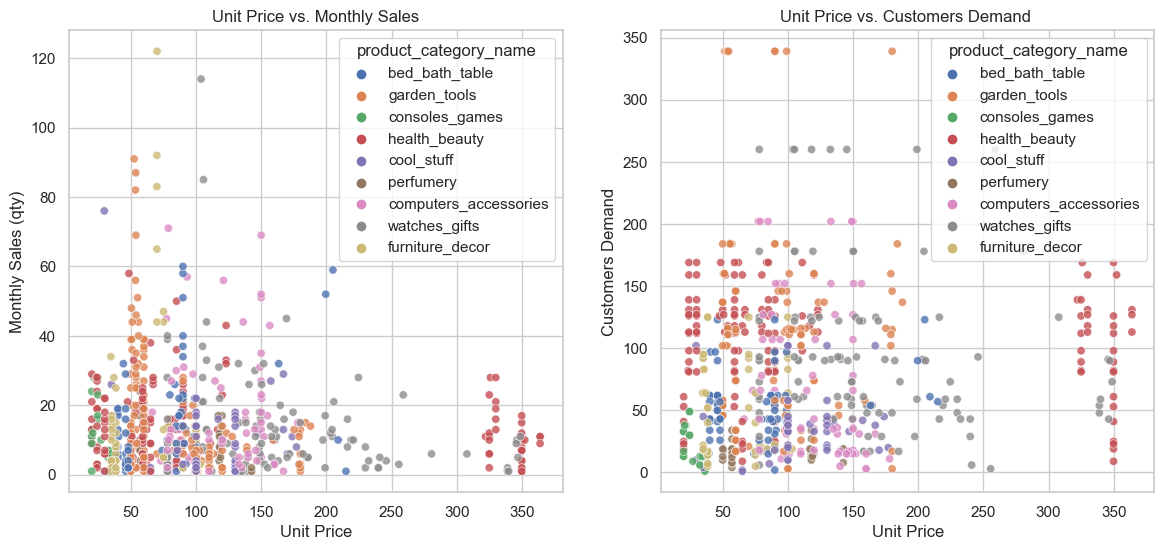

In [74]:
# --- Competitor Impact on monthly demand---

# Setting up the figure size
plt.figure(figsize=(14, 6))

# Subplot 1: Unit Price vs. Monthly Sales
plt.subplot(1, 2, 1)
sns.scatterplot(data=data, x='unit_price', y='qty', hue='product_category_name', alpha=0.8)
plt.title('Unit Price vs. Monthly Sales')
plt.xlabel('Unit Price')
plt.ylabel('Monthly Sales (qty)')

# Subplot 2: Unit Price vs. Customers Demand
plt.subplot(1, 2, 2)
sns.scatterplot(data=data, x='unit_price', y='customers', hue='product_category_name', alpha=0.8)
plt.title('Unit Price vs. Customers Demand ')
plt.xlabel('Unit Price')
plt.ylabel('Customers Demand')
plt.show()

**Subplot 1: Unit Price vs. Monthly Sales**

The scatter plot of monthly sales against unit price reveals a negative correlation, meaning that as the company's unit price increases, the monthly sales (quantity sold) tends to decrease. This is expected as higher prices generally reduces the quantity sold particular for price sensitive products.
    Most of the subcategory product (bed_bath_table, garden_tools, consoles_games, cool_stuff, perfumery,computers_accessories, and furniture_decor) show a sharp decline in sale when the price is increase above 150 unit; suggesting that this subcategories have more elastic demand.
    Some of the subcategory product (healthy_beauty and watches_gifts) shows inelastic demand, that is, changes in prices does not significantly affect their sales, indicating that this products are neccesities.


**Subplot 2: Unit Price vs. Customers Demand**

The scatter plot of customers demand against unit price reveals a negative correlation, meaning that as the company's unit price increases, the customers demand tends to decrease. This is expected as higher prices generally reduces the customers demand, particular for price sensitive products.
    Most of the subcategory product (bed_bath_table, garden_tools, consoles_games, cool_stuff, perfumery,computers_accessories, and furniture_decor) show a sharp decline in customers demand when the price is increase above 200 unit; suggesting that this subcategories have more elastic demand.
    Some of the subcategory product (healthy_beauty and watches_gifts) shows inelastic demand, that is, changes in prices does not significantly affect their demand, indicating that this products are neccesities.
    
For price-sensitive subcategories, maintaining competitive pricing is crucial to retain customers and demand. These are the products that will be focus on for price optimization. For inelastic products, the company could potentially increase prices without experiencing a sharp drop in demand, allowing for higher margins.

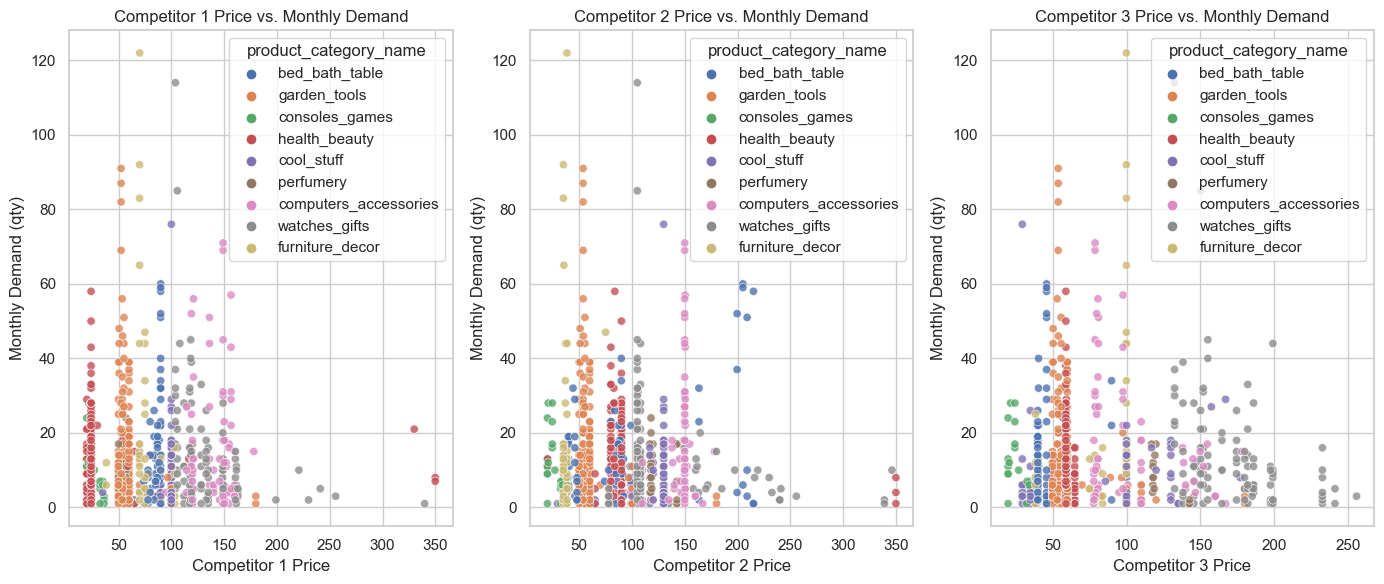

In [75]:
# --- Competitor Impact on monthly demand---

# Setting up the figure size
plt.figure(figsize=(14, 6))

# Subplot 1: Competitor 1 Price vs. Monthly Demand
plt.subplot(1, 3, 1)
sns.scatterplot(data=data, x='comp_1', y='qty', hue='product_category_name', alpha=0.8)
plt.title('Competitor 1 Price vs. Monthly Demand')
plt.xlabel('Competitor 1 Price')
plt.ylabel('Monthly Demand (qty)')

# Subplot 2: Competitor 2 Price vs. Monthly Demand
plt.subplot(1, 3, 2)
sns.scatterplot(data=data, x='comp_2', y='qty', hue='product_category_name', alpha=0.8)
plt.title('Competitor 2 Price vs. Monthly Demand')
plt.xlabel('Competitor 2 Price')
plt.ylabel('Monthly Demand (qty)')

# Subplot 3: Competitor 3 Price vs. Monthly Demand
plt.subplot(1, 3, 3)
sns.scatterplot(data=data, x='comp_3', y='qty', hue='product_category_name', alpha=0.8)
plt.title('Competitor 3 Price vs. Monthly Demand')
plt.xlabel('Competitor 3 Price')
plt.ylabel('Monthly Demand (qty)')

plt.tight_layout()
plt.show()

**Competitors Impact on monthly demand**


The scatter plots between competitor prices (comp_1, comp_2 and comp_3) and monthly demand reveal how sensitive the company’s demand is to competitors' pricing strategies.


**Subplot 1: Competitor 1 Price vs. Monthly Demand**


The scatter plot show a non-linear relationships; where the company's demand significantly increases only when the competitor's price is above 160 unit.



**Subplot 2: Competitor 2 Price vs. Monthly Demand**


The scatter plot show a non-linear relationships; where the company's demand significantly increases only when the competitor's price is above 150 unit. The bed_bath_table subcategory show no significant impact  from competitors’ prices, indicating that the company’s product (bed_bath_table) is differentiated enough that competitor pricing does not sway customers as much.



**Subplot 3: Competitor 3 Price vs. Monthly Demand**


The scatter plot show a non-linear relationships; where the company's demand significantly increases only when the competitor's price is above 75 unit and 150 unit for some subcategory like (bed_bath_table, garden_tools, consoles_games and health_beauty) and (cool_stuff, perfumery, computers_accessories and furniture_decor) respectively. The watches_gifts show no significant impact  from competitors’ prices, indicating that the company’s product (watches_gifts) is differentiated enough that competitor pricing does not sway customers as much. 

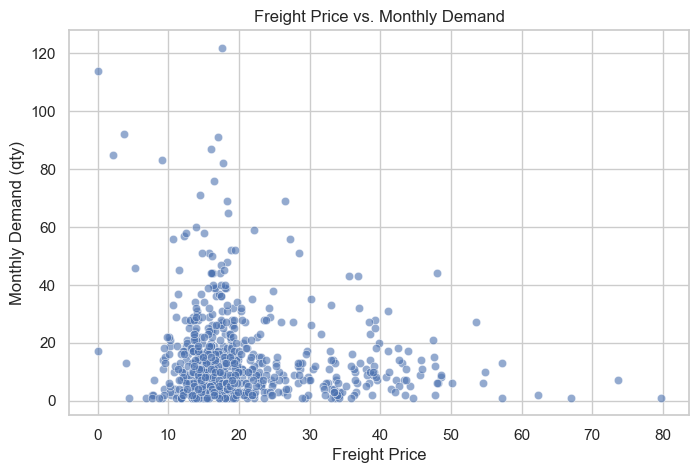

In [76]:
# ---  Freight Costs vs. Demand ---

plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='freight_price', y='qty', alpha=0.6)
plt.title('Freight Price vs. Monthly Demand')
plt.xlabel('Freight Price')
plt.ylabel('Monthly Demand (qty)')
plt.show()

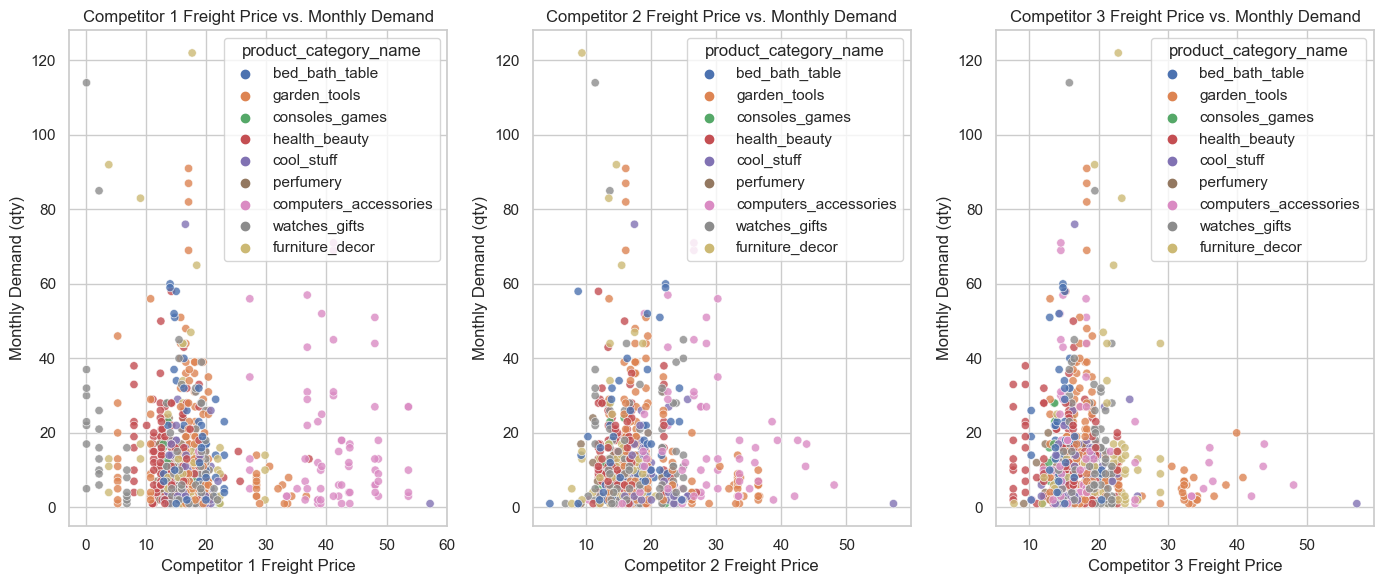

In [77]:
# --- Competitor Impact on monthly demand---

# Setting up the figure size
plt.figure(figsize=(14, 6))

# Subplot 1: Competitor 1 freight Price vs. Monthly Demand
plt.subplot(1, 3, 1)
sns.scatterplot(data=data, x='fp1', y='qty', hue='product_category_name', alpha=0.8)
plt.title('Competitor 1 Freight Price vs. Monthly Demand')
plt.xlabel('Competitor 1 Freight Price')
plt.ylabel('Monthly Demand (qty)')

# Subplot 2: Competitor 2 freight Price vs. Monthly Demand
plt.subplot(1, 3, 2)
sns.scatterplot(data=data, x='fp2', y='qty', hue='product_category_name', alpha=0.8)
plt.title('Competitor 2 Freight Price vs. Monthly Demand')
plt.xlabel('Competitor 2 Freight Price')
plt.ylabel('Monthly Demand (qty)')

# Subplot 3: Competitor 3 freight Price vs. Monthly Demand
plt.subplot(1, 3, 3)
sns.scatterplot(data=data, x='fp3', y='qty', hue='product_category_name', alpha=0.8)
plt.title('Competitor 3 Freight Price vs. Monthly Demand')
plt.xlabel('Competitor 3 Freight Price')
plt.ylabel('Monthly Demand (qty)')

plt.tight_layout()
plt.show()

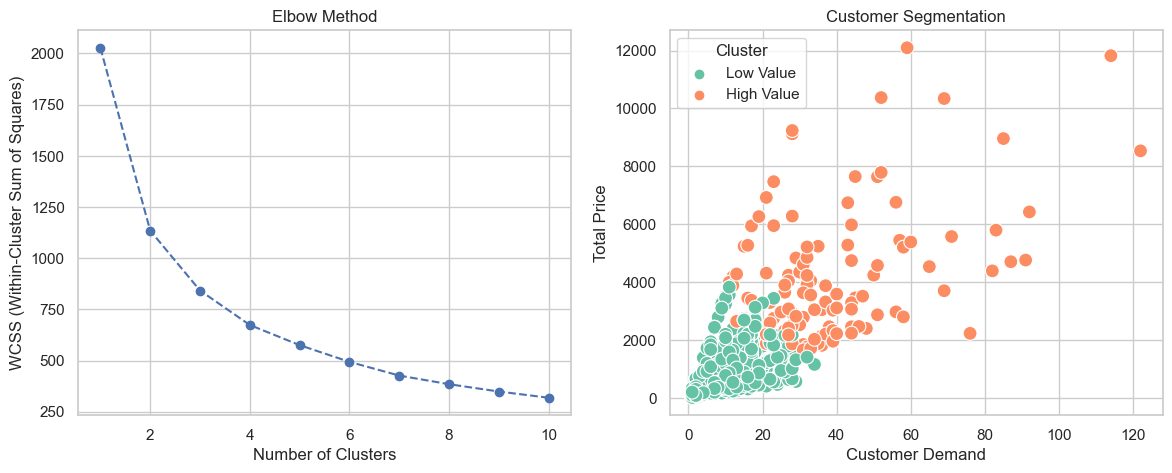

In [78]:
# Customer Segmentation: Using K-Means to segment customers based on their spending behavior.

# feature selection for customer segmentation
customer = data.copy()
customer_data = customer[['qty', 'total_price', 'customers']]

# customer data standardization
scaler = StandardScaler()
customer_data_scale = scaler.fit_transform(customer_data)

# Determining the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(customer_data_scale)
    wcss.append(kmeans.inertia_)
    
# Plotting the Elbow Method to find the optimal number of clusters
plt.figure(figsize=(14, 5))
plt.subplot(1,2,1)
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')

# Choosing the optimal number of clusters based on the Elbow plot
optimal_clusters = 2
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(customer_data_scale)

# Addding the cluster labels to the original dataset
customer_data['Cluster'] = kmeans.labels_
customer_data['Cluster'] = ["High Value" if i==1 else "Low Value" for i in customer_data['Cluster']]

# Visualizing the clusters 
plt.subplot(1,2,2)
sns.scatterplot(x=customer_data['qty'], y=customer_data['total_price'], hue=customer_data['Cluster'], palette='Set2', s=100)
plt.title('Customer Segmentation')
plt.xlabel('Customer Demand')
plt.ylabel('Total Price')
plt.show()

Customer Segmentation using K-Means is a popular method for identifying different groups of customers based on their spending behavior. The chart of customer segment and clustering (using elbow method) shown above reveals that there are two groups of customer based on their spending behavior which can be perceived as high-value and low-value customers. The high value customers regardless of price increase they still patronize the company's whereas the low-value customers as total price of the company's products increases the competitors pricing sways them away.

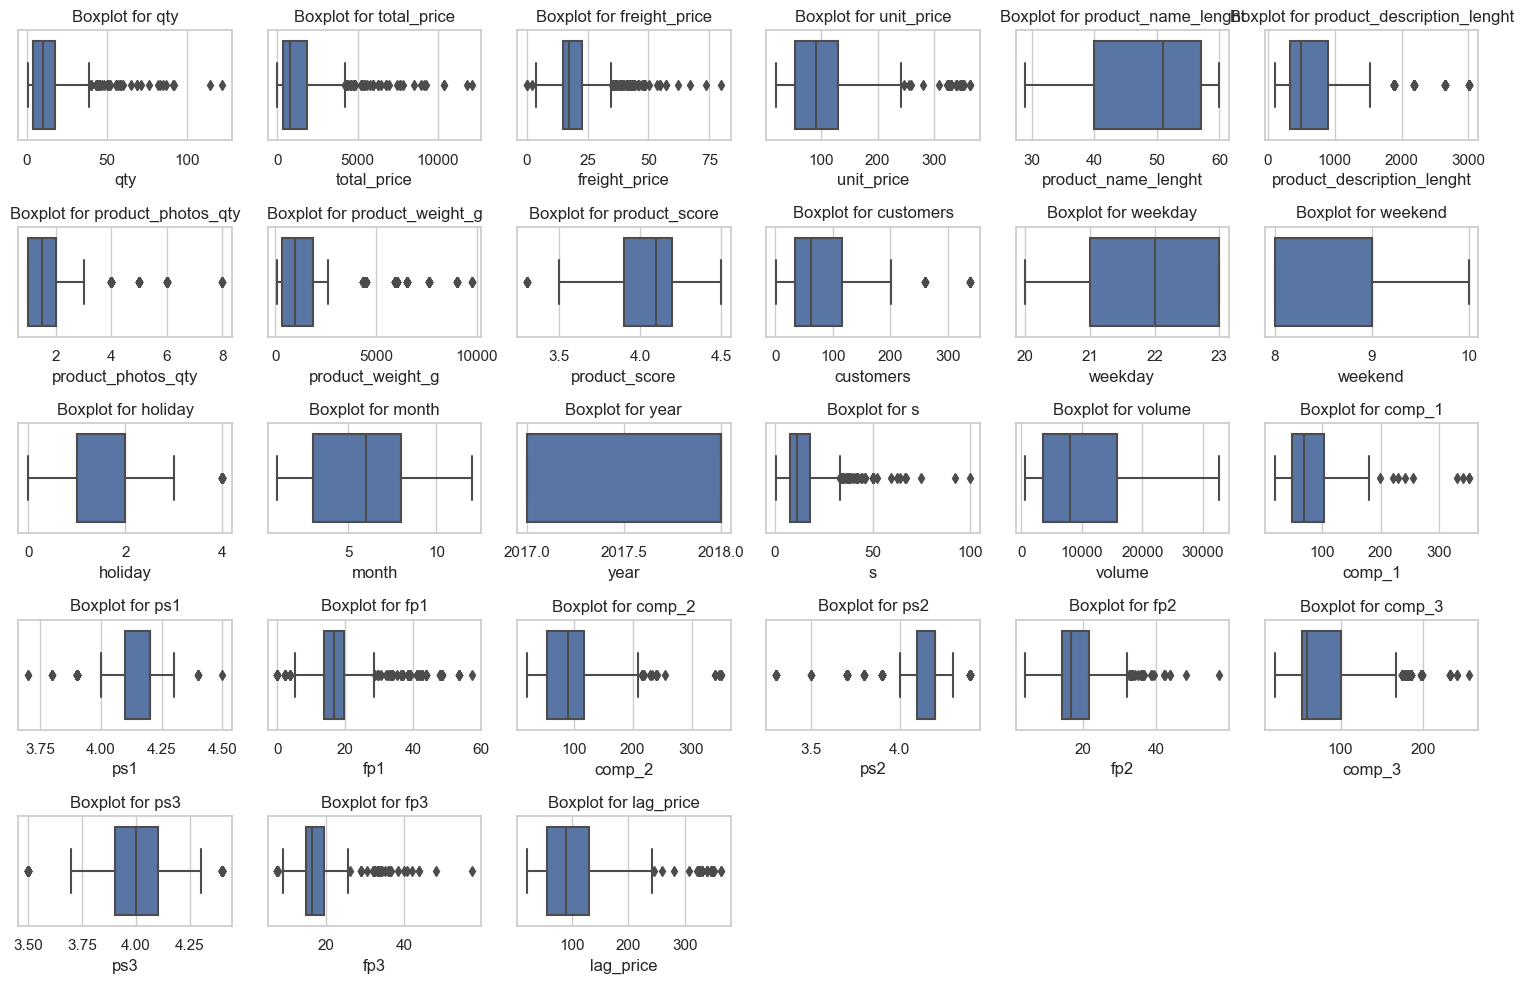

In [79]:
# Visualizing  Outliers using Boxplot

# Separating numerical and categorical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Boxplot for numerical features to check outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(5, 6, i)  
    sns.boxplot(data=data, x=col)
    plt.title(f'Boxplot for {col}')
plt.tight_layout()
plt.show()

Outliers can distort statiscal analysis and affect machine learning models, so it is essential to check and visualize them.

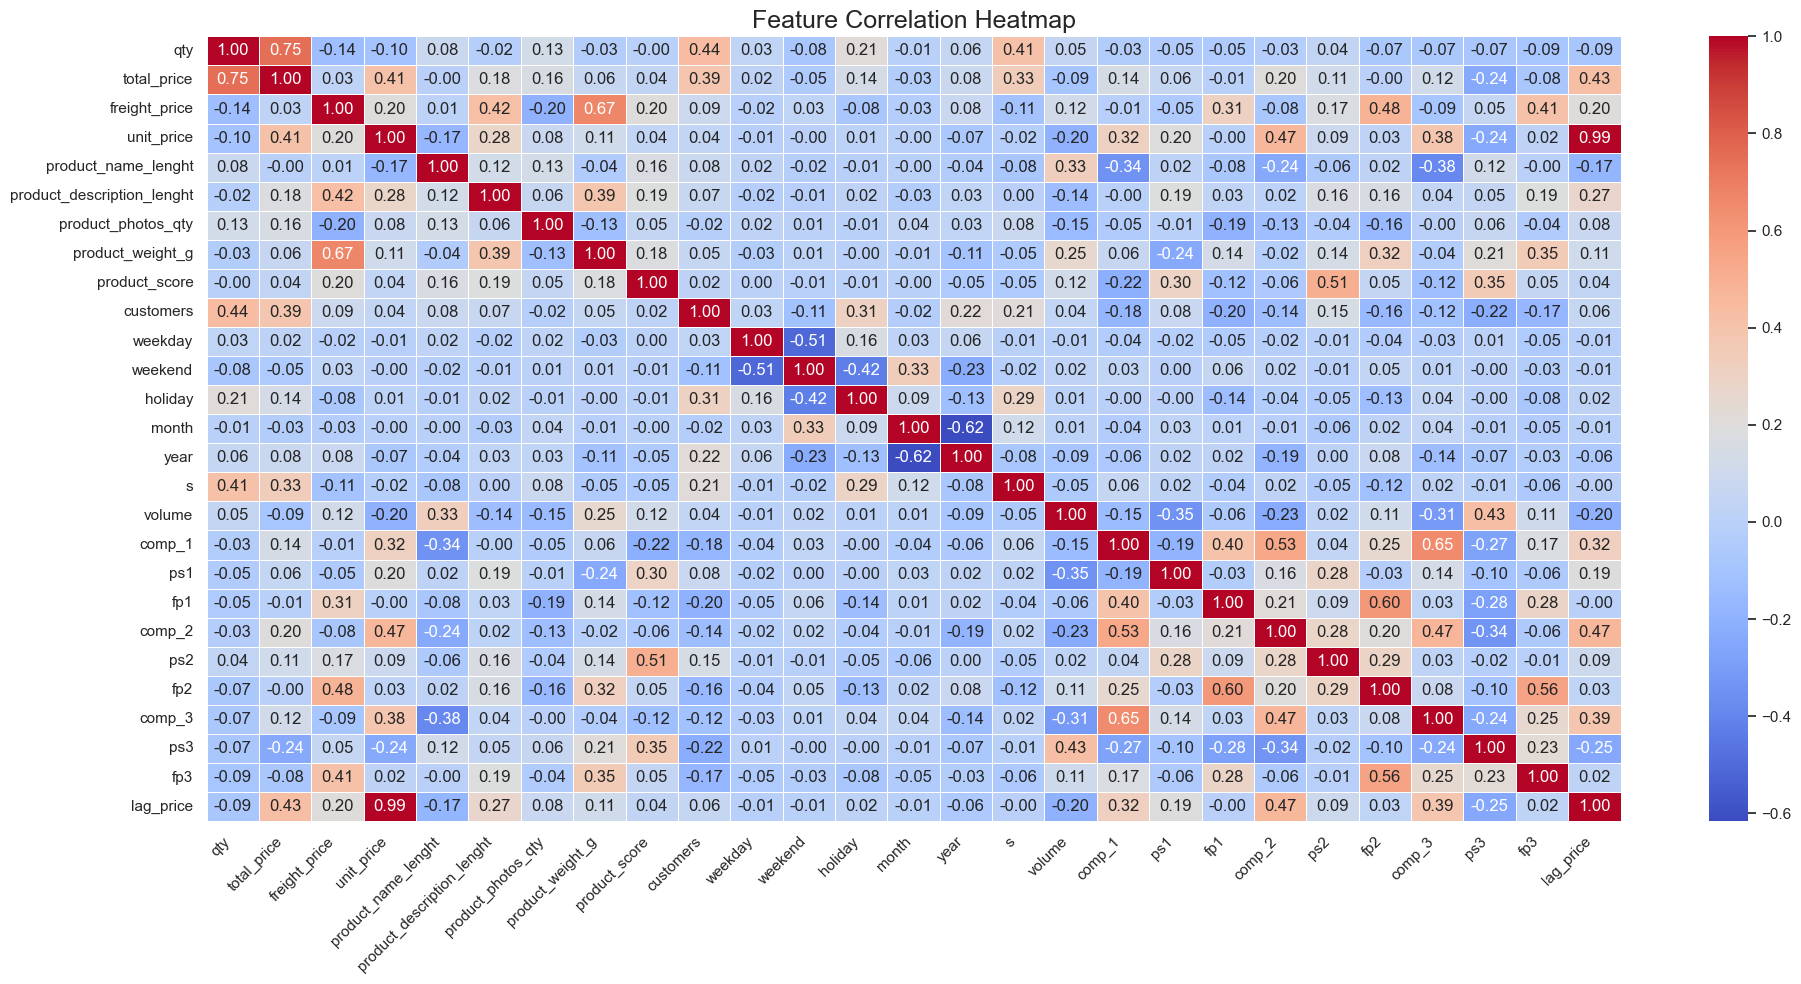

In [80]:
# visualizing how different features are correlated with each other using correlation heatmap

# Computing the correlation matrix
corr_matrix = data.corr()

# Setting up the matplotlib figure
plt.figure(figsize=(20, 10))

# Drawing the heatmap with Seaborn
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

# Adding the titles and labels
plt.title('Feature Correlation Heatmap', fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Showing the plot
plt.show()

The correlation heatmap above show how different numerical features are correlated with each other. Understanding this can help guide pricing strategies, marketing efforts, and supply chain adjustments.Features with correlations close to 1 (dark red) have a strong positive relationship,features with correlations close to -1 (dark blue) have a strong negative relationship while features with correlations close to 0 (lighter colors) have little to no linear relationship.

### Features Selection and Engineering

In [81]:
# Adding more informative features

# creating weekend ratio feature to indicate how "weekend-heavy" a month is.
data['weekend_ratio'] = data['weekend'] / (data['weekend'] + data['weekday'])

# Creating features that represent the price difference between the company’s products and each competitor
data['price_diff_comp1'] = data['unit_price'] - data['comp_1']
data['price_diff_comp2'] = data['unit_price'] - data['comp_2']
data['price_diff_comp3'] = data['unit_price'] - data['comp_3']

# creating an aggregate feature that combines all competitor price differences into one value.
data['competitive_price_index'] = (data['price_diff_comp1'] + data['price_diff_comp2'] + data['price_diff_comp3']) / 3

# Creating an aggregate feature that compares the company’s freight_price to the average freight price of competitors
data['freight_ratio'] = data['freight_price'] / ((data['fp1'] + data['fp2'] + data['fp3']) / 3)

# Creating an aggregate feature that compares the company’s user's ratings to the average user's ratings of competitors
data['ratings_ratio'] = data['product_score'] / ((data['ps1'] + data['ps2'] + data['ps3']) / 3)

# creating features for product weight to competitors price ratio 
data['comp1_weight_ratio'] = data['product_weight_g'] / data['comp_1']
data['comp2_weight_ratio'] = data['product_weight_g'] / data['comp_2']
data['comp3_weight_ratio'] = data['product_weight_g'] / data['comp_3']

# creating competitors product weight index 
data['competitive_weight_index'] = (data['comp1_weight_ratio'] + data['comp2_weight_ratio'] + data['comp3_weight_ratio'])/3

# creating features for product name lenght to competitors price ratio 
data['comp1_Nlenght_ratio'] = data['product_name_lenght'] / data['comp_1']
data['comp2_Nlenght_ratio'] = data['product_name_lenght'] / data['comp_2']
data['comp3_Nlenght_ratio'] = data['product_name_lenght'] / data['comp_3']

# creating competitors product name lenght index
data['competitive_Namelenght_index'] = (data['comp1_Nlenght_ratio'] + data['comp2_Nlenght_ratio'] + data['comp3_Nlenght_ratio'])/3

# creating feature for product description lenght to competitors price ratio 
data['comp1_Dlenght_ratio'] = data['product_description_lenght'] / data['comp_1']
data['comp2_Dlenght_ratio'] = data['product_description_lenght'] / data['comp_2']
data['comp3_Dlenght_ratio'] = data['product_description_lenght'] / data['comp_3']

# creating competitors product description lenght index
data['competitive_Descriptionlenght_index'] = (data['comp1_Dlenght_ratio'] + data['comp2_Dlenght_ratio'] + data['comp3_Dlenght_ratio'])/3

# Creating a binary flag for months with important holidays (December for Christmas, November for Black Friday).
data['holiday_month'] = data['month'].apply(lambda x: 1 if x in [11, 12] else 0)

In [82]:
# dropping features and selection of new data for modelling

features_to_drop = ['product_id','month_year','s','freight_price','product_name_lenght','fp1','fp2','fp3','product_weight_g',
'comp_1','comp_2','comp_3','product_description_lenght','weekday', 'weekend','year','holiday','price_diff_comp1','product_score', 
'price_diff_comp2', 'price_diff_comp3','comp1_weight_ratio','comp2_weight_ratio', 'comp3_weight_ratio', 'comp1_Nlenght_ratio', 
'comp2_Nlenght_ratio','comp3_Nlenght_ratio','comp1_Dlenght_ratio','comp2_Dlenght_ratio', 'comp3_Dlenght_ratio','ps1','ps2','ps3']

# creation of data for modelling
Engineered_data = data.drop(columns = features_to_drop, axis = 1)

In [83]:
# creation of subdata for each products subcategory

garden_tools_Data = Engineered_data.loc[Engineered_data["product_category_name"] == "garden_tools"].reset_index(drop=True)

health_beauty_Data = Engineered_data.loc[Engineered_data["product_category_name"] == "health_beauty"].reset_index(drop=True)

watches_gifts_Data = Engineered_data.loc[Engineered_data["product_category_name"] == "watches_gifts"].reset_index(drop=True)

computers_accessories_Data = Engineered_data.loc[Engineered_data["product_category_name"] == "computers_accessories"].reset_index(drop=True)

bed_bath_table_Data = Engineered_data.loc[Engineered_data["product_category_name"] == "bed_bath_table"].reset_index(drop=True)

cool_stuff_Data = Engineered_data.loc[Engineered_data["product_category_name"] == "cool_stuff"].reset_index(drop=True)

furniture_decor_Data = Engineered_data.loc[Engineered_data["product_category_name"] == "furniture_decor"].reset_index(drop=True)

perfumery_Data = Engineered_data.loc[Engineered_data["product_category_name"] == "perfumery"].reset_index(drop=True)

consoles_games_Data = Engineered_data.loc[Engineered_data["product_category_name"] == "consoles_games"].reset_index(drop=True)

In [84]:
# creating the target features
y_garden_tools = garden_tools_Data["unit_price"]
y_health_beauty = health_beauty_Data["unit_price"]
y_watches_gifts = watches_gifts_Data["unit_price"]
y_computers_accessories = computers_accessories_Data["unit_price"]
y_bed_bath_table = bed_bath_table_Data["unit_price"]
y_cool_stuff = cool_stuff_Data["unit_price"]
y_furniture_decor = furniture_decor_Data["unit_price"]
y_perfumery = perfumery_Data["unit_price"]
y_consoles_games = consoles_games_Data["unit_price"]

In [85]:
# creating function for centering and scaling numerical features for each subcategory

def centering_scaling(subdata):
    
    # Separating numerical and categorical columns
    numerical_cols = subdata.select_dtypes(include=['int64', 'float64']).columns
    categorical_cols = subdata.select_dtypes(include=['object']).columns
    
    # dropping the product category name
    subdata.drop(columns = categorical_cols, axis = 1, inplace = True)

    for column in numerical_cols:
        mu = np.mean(subdata[column])
        sigma = np.std(subdata[column])
        subdata[column] = (subdata[column] - mu) / sigma 
        
    # transforming each features
    scaler = StandardScaler()
    for feature in subdata.columns:
        subdata[feature] = scaler.fit_transform(subdata[[feature]])

In [86]:
# centering and scaling each subcategory data
centering_scaling(garden_tools_Data)
centering_scaling(health_beauty_Data)
centering_scaling(watches_gifts_Data)
centering_scaling(computers_accessories_Data)
centering_scaling(bed_bath_table_Data)
centering_scaling(cool_stuff_Data)
centering_scaling(furniture_decor_Data)
centering_scaling(perfumery_Data)
centering_scaling(consoles_games_Data)

### Cross Validation and Modelling (Regression)

#### garden tools category modelling

In [87]:
# setting up hyperparameter grids for DecisionTreeRegressor model

DTR_params = {  'criterion': ['poisson','squared_error', 'friedman_mse', 'absolute_error'],
                'splitter': ['best', 'random'],
                 'max_features': ['sqrt', 'log2'],
                 'max_depth': [None, 10, 20],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4],
                 "random_state" : [None, 42, 100, 500]}

DTR_model = DecisionTreeRegressor()

# Initializing GridSearchCV for DecisionTreeRegressor model
grid_dt = GridSearchCV(DTR_model, DTR_params, cv=5, scoring='neg_mean_squared_error', n_jobs=1, verbose=1)

def cross_validate_garden(X,y):
    
    #training the model
    grid_dt.fit(X, y)

    
    # Geting the best parameters and the best model for DecisionTreeRegressor.
    global best_dt_garden
    best_dt_garden = grid_dt.best_estimator_

    
def evaluate_model(best_model, X_test, y_test):

    # Making predictions on the test set
    y_pred = best_model.predict(X_test)
    
    #metrics for model performance
    r2 = r2_score(y_test,y_pred)
    mae = mean_absolute_error(y_test,y_pred)
    
    print(f"\nDecisionTreeRegressor - R^2 Score: {r2:.2f}, Mean Absolute Error: {mae:.2f}")
    
    # Using SHAP values to explain individual predictions and see how each feature contributed to the prediction
    import shap
    explainer = shap.TreeExplainer(best_model)
    shap_values = explainer.shap_values(X_test)
    
    # Plotting a SHAP summary plot to show how all features influence the model's output
    shap.summary_plot(shap_values, X_test)

Fitting 5 folds for each of 1728 candidates, totalling 8640 fits

DecisionTreeRegressor - R^2 Score: 0.97, Mean Absolute Error: 2.41


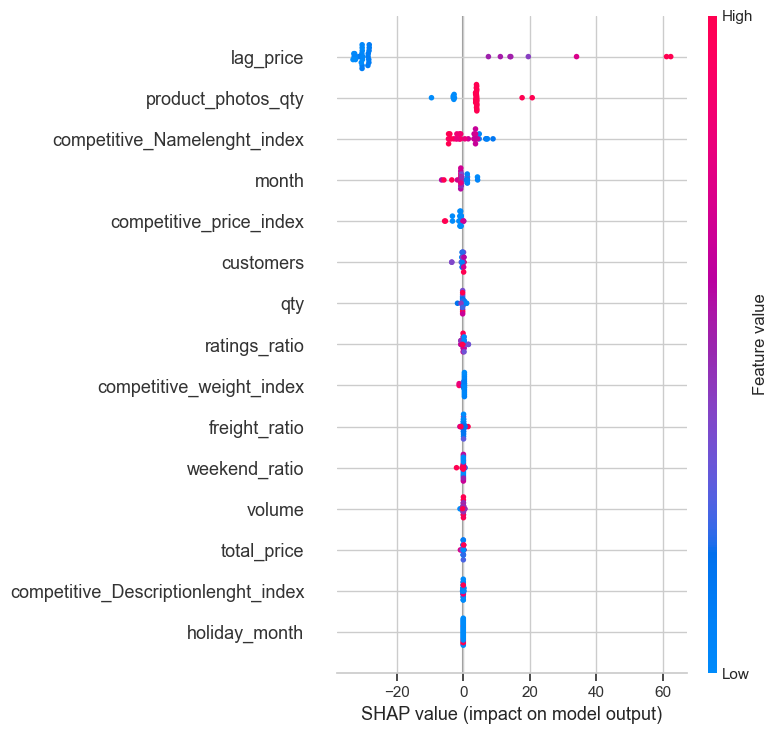

In [88]:
#  creating DecisionTreeRegressor model for garden tools product

#  splitting the subdataset of garden tools product

X_garden_tools = garden_tools_Data.drop(columns = ["unit_price"], axis = 1)

X1_train, X1_test, y1_train, y1_test = train_test_split(X_garden_tools, y_garden_tools, test_size=0.2,random_state=42)

cross_validate_garden(X = X1_train, y = y1_train)
evaluate_model(best_model = best_dt_garden,  X_test = X1_test, y_test = y1_test)

In [89]:
# joblib.dump(best_dt_garden , "best_model_garden.joblib")
# print("model save successfully")

#### health_beauty category modelling

In [90]:
# creating fuction for cross validation

def cross_validate_health(X,y):
    
    #training the model
    grid_dt.fit(X, y)

    
    # Geting the best parameters and the best model for DecisionTreeRegressor.
    global best_dt_health
    best_dt_health = grid_dt.best_estimator_

In [91]:
print(health_beauty_Data.shape)
print(health_beauty_Data.isna().sum())
print(health_beauty_Data.duplicated().sum().sum())

(130, 16)
qty                                    0
total_price                            0
unit_price                             0
product_photos_qty                     0
customers                              0
month                                  0
volume                                 0
lag_price                              0
weekend_ratio                          0
competitive_price_index                0
freight_ratio                          0
ratings_ratio                          0
competitive_weight_index               0
competitive_Namelenght_index           0
competitive_Descriptionlenght_index    0
holiday_month                          0
dtype: int64
0


Fitting 5 folds for each of 1728 candidates, totalling 8640 fits

DecisionTreeRegressor - R^2 Score: 1.00, Mean Absolute Error: 3.21


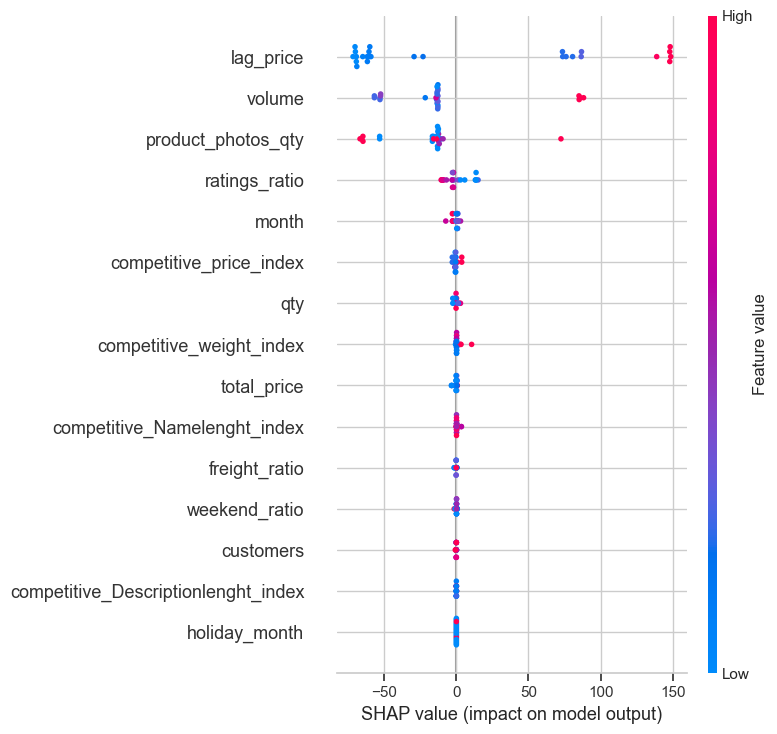

In [92]:
#  creating DecisionTreeRegressor model for health_beauty product

#  splitting the subdataset of health_beauty product

X_health_beauty = health_beauty_Data.drop(columns = ["unit_price"], axis = 1)

X2_train, X2_test, y2_train, y2_test = train_test_split(X_health_beauty, y_health_beauty, test_size=0.2,random_state=42)

cross_validate_health(X = X2_train, y = y2_train)
evaluate_model(best_model = best_dt_health,  X_test = X2_test, y_test = y2_test)

In [93]:
# joblib.dump(best_dt_health , "best_model_health.joblib")
# print("model save successfully")

#### watches_gifts category modelling

In [94]:
# creating fuction for cross validation

def cross_validate_watches(X,y):
    
    #training the model
    grid_dt.fit(X, y)

    
    # Geting the best parameters and the best model for DecisionTreeRegressor.
    global best_dt_watches
    best_dt_watches = grid_dt.best_estimator_

In [95]:
print(watches_gifts_Data.shape)
print(watches_gifts_Data.isna().sum())
print(watches_gifts_Data.duplicated().sum().sum())

(103, 16)
qty                                    0
total_price                            0
unit_price                             0
product_photos_qty                     0
customers                              0
month                                  0
volume                                 0
lag_price                              0
weekend_ratio                          0
competitive_price_index                0
freight_ratio                          0
ratings_ratio                          0
competitive_weight_index               0
competitive_Namelenght_index           0
competitive_Descriptionlenght_index    0
holiday_month                          0
dtype: int64
0


Fitting 5 folds for each of 1728 candidates, totalling 8640 fits

DecisionTreeRegressor - R^2 Score: 0.97, Mean Absolute Error: 7.65


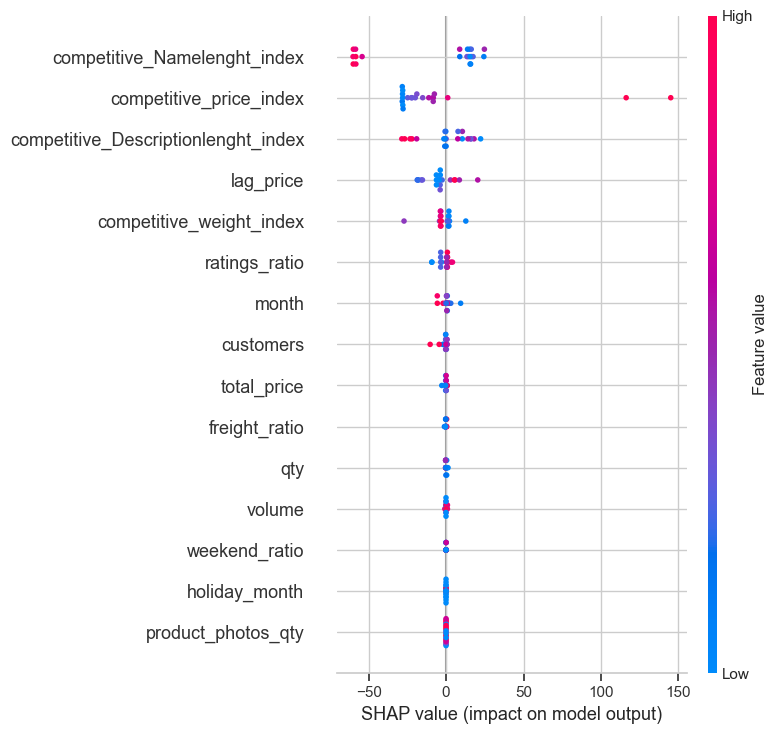

In [121]:
#  creating DecisionTreeRegressor model for watches_gifts product

#  splitting the subdataset of watches_gifts product

X_watches_gifts = watches_gifts_Data.drop(columns = ["unit_price"], axis = 1)

X3_train, X3_test, y3_train, y3_test = train_test_split(X_watches_gifts, y_watches_gifts, test_size=0.2,random_state=250)

cross_validate_watches(X = X3_train, y = y3_train)
evaluate_model(best_model = best_dt_watches,  X_test = X3_test, y_test = y3_test)

In [97]:
# joblib.dump(best_dt_watches , "best_watches_gifts.joblib")
# print("model save successfully")

#### computers_accessories category modelling

In [98]:
# creating fuction for cross validation

def cross_validate_computers(X,y):
    
    #training the model
    grid_dt.fit(X, y)

    
    # Geting the best parameters and the best model for DecisionTreeRegressor.
    global best_dt_computers
    best_dt_computers = grid_dt.best_estimator_

In [99]:
print(computers_accessories_Data.shape)
print(computers_accessories_Data.isna().sum())
print(computers_accessories_Data.duplicated().sum().sum())

(69, 16)
qty                                     0
total_price                             0
unit_price                              0
product_photos_qty                     69
customers                               0
month                                   0
volume                                  0
lag_price                               0
weekend_ratio                           0
competitive_price_index                 0
freight_ratio                           0
ratings_ratio                           0
competitive_weight_index                0
competitive_Namelenght_index            0
competitive_Descriptionlenght_index     0
holiday_month                           0
dtype: int64
0


The product_photos_qty values are all empties(NAN).

Fitting 5 folds for each of 1728 candidates, totalling 8640 fits

DecisionTreeRegressor - R^2 Score: 0.83, Mean Absolute Error: 7.03


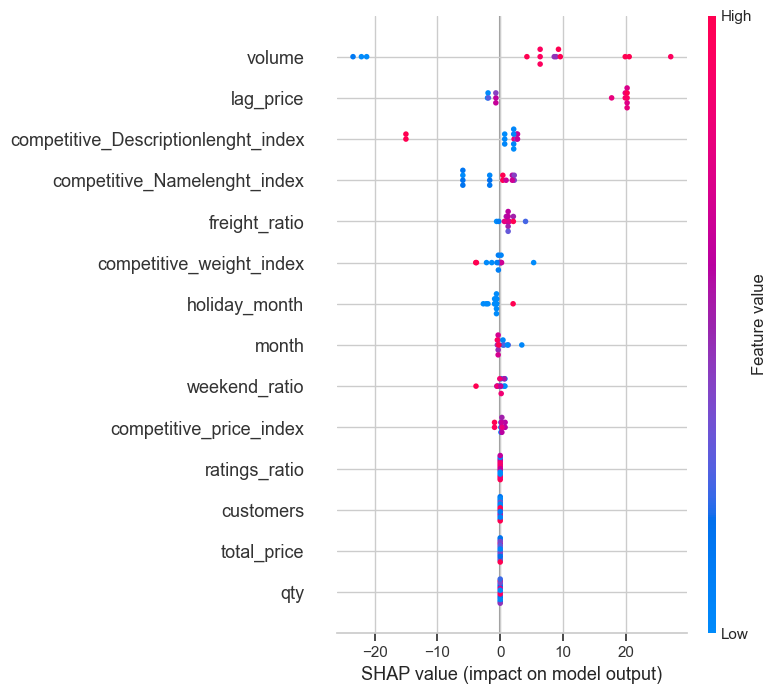

In [100]:
#  creating DecisionTreeRegressor model for computers_accessories product

#  splitting the subdataset of computers_accessories product

X_computers_accessories = computers_accessories_Data.drop(columns = ["unit_price", "product_photos_qty"], axis = 1)

X4_train, X4_test, y4_train, y4_test = train_test_split(X_computers_accessories, y_computers_accessories, test_size=0.2,random_state=250)

cross_validate_computers(X = X4_train, y = y4_train)
evaluate_model(best_model = best_dt_computers,  X_test = X4_test, y_test = y4_test)

In [101]:
# joblib.dump(best_dt_computers , "best_dt_computers.joblib")
# print("model save successfully")

#### bed_bath_table category modelling

In [102]:
# creating fuction for cross validation

def cross_validate_bed_bath_table(X,y):
    
    #training the model
    grid_dt.fit(X, y)

    
    # Geting the best parameters and the best model for DecisionTreeRegressor.
    global best_dt_bed_bath_table
    best_dt_bed_bath_table = grid_dt.best_estimator_

In [103]:
print(bed_bath_table_Data.shape)
print(bed_bath_table_Data.isna().sum())
print(bed_bath_table_Data.duplicated().sum().sum())

(61, 16)
qty                                    0
total_price                            0
unit_price                             0
product_photos_qty                     0
customers                              0
month                                  0
volume                                 0
lag_price                              0
weekend_ratio                          0
competitive_price_index                0
freight_ratio                          0
ratings_ratio                          0
competitive_weight_index               0
competitive_Namelenght_index           0
competitive_Descriptionlenght_index    0
holiday_month                          0
dtype: int64
0


Fitting 5 folds for each of 1728 candidates, totalling 8640 fits

DecisionTreeRegressor - R^2 Score: 0.99, Mean Absolute Error: 2.18


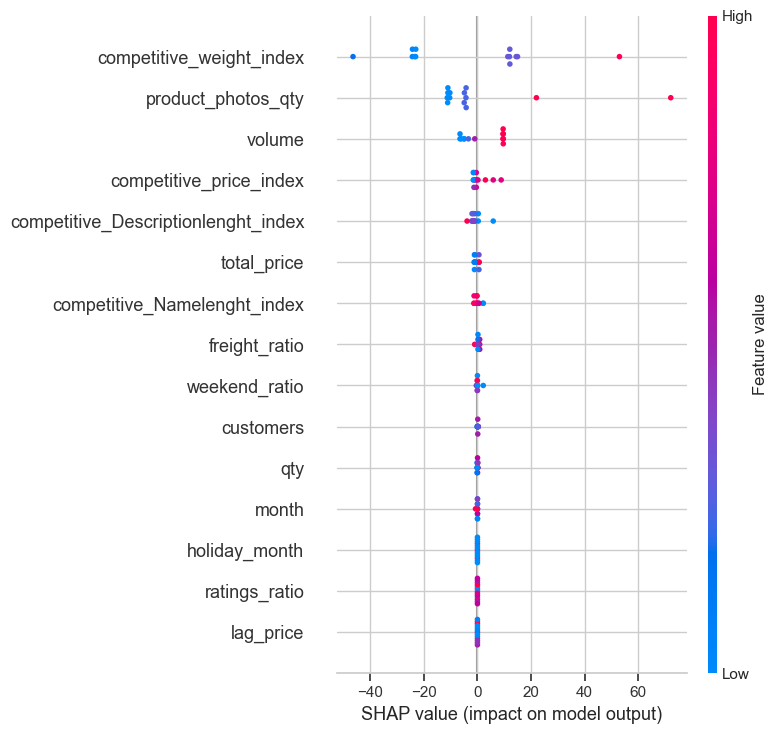

In [104]:
#  creating DecisionTreeRegressor model for bed_bath_table product

#  splitting the subdataset of bed_bath_table product

X_bed_bath_table = bed_bath_table_Data.drop(columns = ["unit_price"], axis = 1)

X5_train, X5_test, y5_train, y5_test = train_test_split(X_bed_bath_table, y_bed_bath_table, test_size=0.2,random_state=250)

cross_validate_bed_bath_table(X = X5_train, y = y5_train)
evaluate_model(best_model = best_dt_bed_bath_table,  X_test = X5_test, y_test = y5_test)

In [105]:
# joblib.dump(best_dt_bed_bath_table , "best_dt_bed_bath_table.joblib")
# print("model save successfully")

#### cool_stuff category modelling

In [106]:
# creating fuction for cross validation

def cross_validate_cool_stuff(X,y):
    
    #training the model
    grid_dt.fit(X, y)

    
    # Geting the best parameters and the best model for DecisionTreeRegressor.
    global best_dt_cool_stuff
    best_dt_cool_stuff = grid_dt.best_estimator_

In [107]:
print(cool_stuff_Data.shape)
print(cool_stuff_Data.isna().sum())
print(cool_stuff_Data.duplicated().sum().sum())

(57, 16)
qty                                    0
total_price                            0
unit_price                             0
product_photos_qty                     0
customers                              0
month                                  0
volume                                 0
lag_price                              0
weekend_ratio                          0
competitive_price_index                0
freight_ratio                          0
ratings_ratio                          0
competitive_weight_index               0
competitive_Namelenght_index           0
competitive_Descriptionlenght_index    0
holiday_month                          0
dtype: int64
0


Fitting 5 folds for each of 1728 candidates, totalling 8640 fits

DecisionTreeRegressor - R^2 Score: 0.85, Mean Absolute Error: 5.86


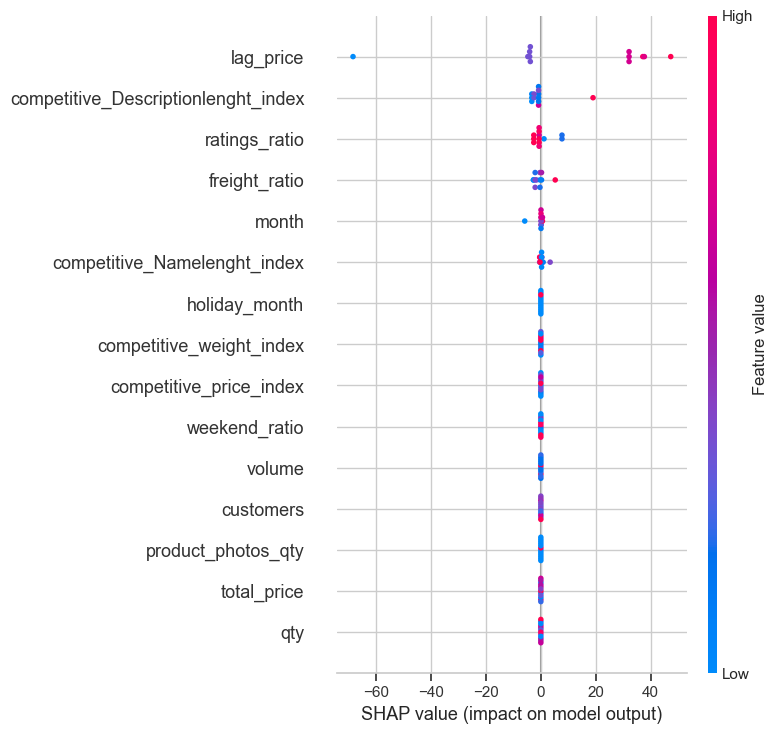

In [120]:
#  creating DecisionTreeRegressor model for cool_stuff product

#  splitting the subdataset of cool_stuff product

X_cool_stuff = cool_stuff_Data.drop(columns = ["unit_price"], axis = 1)

X6_train, X6_test, y6_train, y6_test = train_test_split(X_cool_stuff, y_cool_stuff, test_size=0.2,random_state=42)

cross_validate_cool_stuff(X = X6_train, y = y6_train)
evaluate_model(best_model = best_dt_cool_stuff,  X_test = X6_test, y_test = y6_test)

In [109]:
# joblib.dump(best_dt_cool_stuff , "best_dt_cool_stuff.joblib")
# print("model save successfully")

#### furniture_decor category modelling

In [110]:
# creating fuction for cross validation

def cross_validate_furniture_decor(X,y):
    
    #training the model
    grid_dt.fit(X, y)

    
    # Geting the best parameters and the best model for DecisionTreeRegressor.
    global best_dt_furniture_decor
    best_dt_furniture_decor = grid_dt.best_estimator_

In [111]:
print(furniture_decor_Data.shape)
print(furniture_decor_Data.isna().sum())
print(furniture_decor_Data.duplicated().sum().sum())

(48, 16)
qty                                    0
total_price                            0
unit_price                             0
product_photos_qty                     0
customers                              0
month                                  0
volume                                 0
lag_price                              0
weekend_ratio                          0
competitive_price_index                0
freight_ratio                          0
ratings_ratio                          0
competitive_weight_index               0
competitive_Namelenght_index           0
competitive_Descriptionlenght_index    0
holiday_month                          0
dtype: int64
0


Fitting 5 folds for each of 1728 candidates, totalling 8640 fits

DecisionTreeRegressor - R^2 Score: 0.92, Mean Absolute Error: 3.90


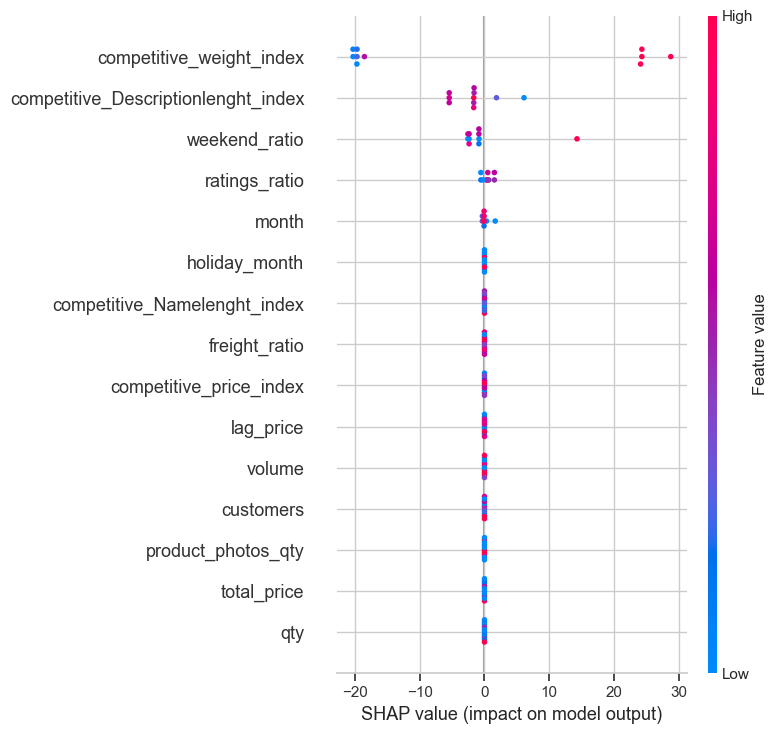

In [112]:
#  creating DecisionTreeRegressor model for furniture_decor product

#  splitting the subdataset of furniture_decor product

X_furniture_decor = furniture_decor_Data.drop(columns = ["unit_price"], axis = 1)

X7_train, X7_test, y7_train, y7_test = train_test_split(X_furniture_decor, y_furniture_decor, test_size=0.2,random_state=42)

cross_validate_furniture_decor(X = X7_train, y = y7_train)
evaluate_model(best_model = best_dt_furniture_decor,  X_test = X7_test, y_test = y7_test)

#### perfumery category modelling

In [113]:
# creating fuction for cross validation

def cross_validate_perfumery(X,y):
    
    #training the model
    grid_dt.fit(X, y)

    
    # Geting the best parameters and the best model for DecisionTreeRegressor.
    global best_dt_perfumery
    best_dt_perfumery = grid_dt.best_estimator_

In [114]:
print(perfumery_Data.shape)
print(perfumery_Data.isna().sum())
print(perfumery_Data.duplicated().sum().sum())

(26, 16)
qty                                    0
total_price                            0
unit_price                             0
product_photos_qty                     0
customers                              0
month                                  0
volume                                 0
lag_price                              0
weekend_ratio                          0
competitive_price_index                0
freight_ratio                          0
ratings_ratio                          0
competitive_weight_index               0
competitive_Namelenght_index           0
competitive_Descriptionlenght_index    0
holiday_month                          0
dtype: int64
0


Fitting 5 folds for each of 1728 candidates, totalling 8640 fits

DecisionTreeRegressor - R^2 Score: 0.99, Mean Absolute Error: 1.21


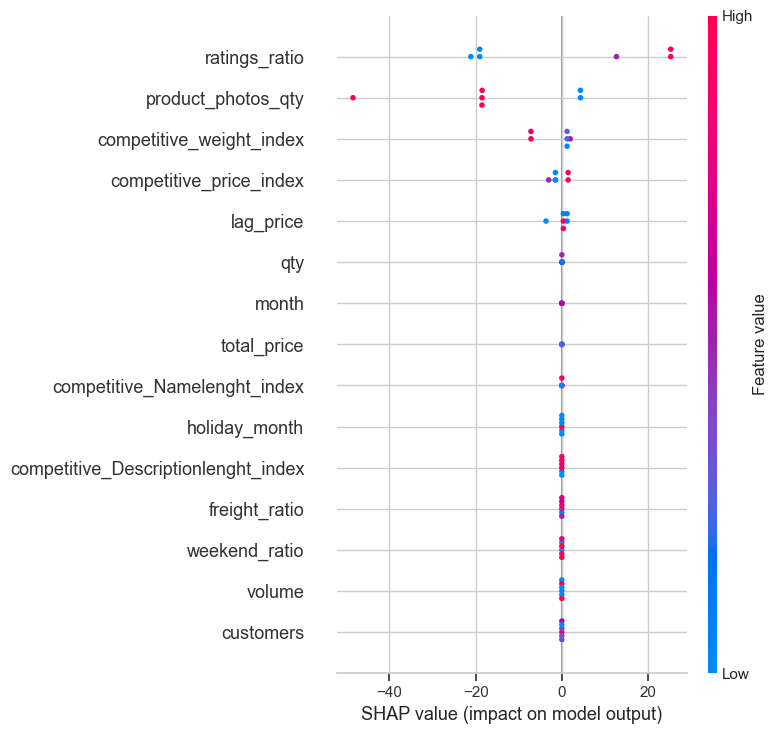

In [115]:
#  creating DecisionTreeRegressor model for perfumery product

#  splitting the subdataset of perfumery product

X_perfumery = perfumery_Data.drop(columns = ["unit_price"], axis = 1)

X8_train, X8_test, y8_train, y8_test = train_test_split(X_perfumery, y_perfumery, test_size=0.2,random_state=42)

cross_validate_perfumery(X = X8_train, y = y8_train)
evaluate_model(best_model = best_dt_perfumery,  X_test = X8_test, y_test = y8_test)

#### consoles_games category modelling

In [116]:
# creating fuction for cross validation

def cross_validate_consoles_games(X,y):
    
    #training the model
    grid_dt.fit(X, y)

    
    # Geting the best parameters and the best model for DecisionTreeRegressor.
    global best_dt_consoles_games
    best_dt_consoles_games = grid_dt.best_estimator_

In [117]:
print(consoles_games_Data.shape)
print(consoles_games_Data.isna().sum())
print(consoles_games_Data.duplicated().sum().sum())

(22, 16)
qty                                     0
total_price                             0
unit_price                              0
product_photos_qty                      0
customers                               0
month                                   0
volume                                 22
lag_price                               0
weekend_ratio                           0
competitive_price_index                 0
freight_ratio                           0
ratings_ratio                           0
competitive_weight_index                0
competitive_Namelenght_index            0
competitive_Descriptionlenght_index     0
holiday_month                           0
dtype: int64
0


Fitting 5 folds for each of 1728 candidates, totalling 8640 fits

DecisionTreeRegressor - R^2 Score: 0.98, Mean Absolute Error: 0.65


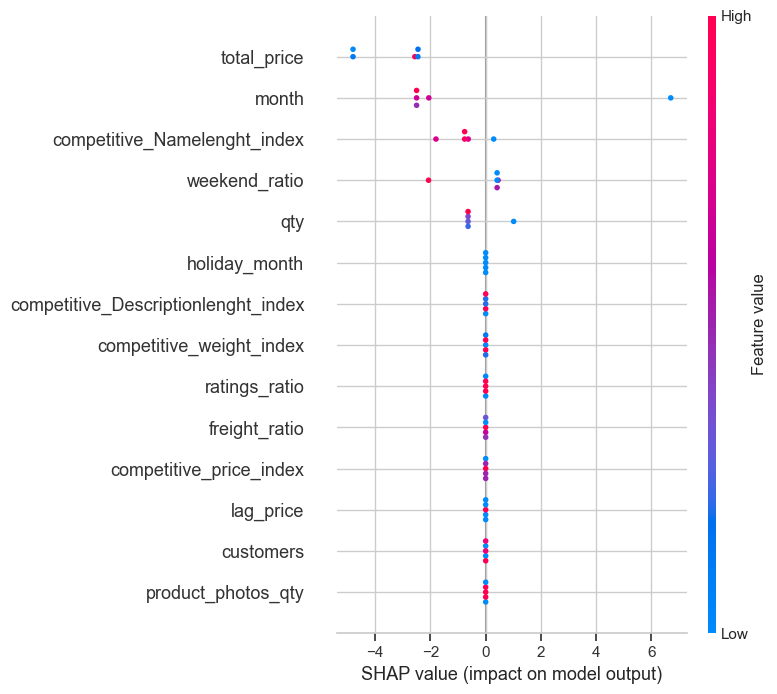

In [119]:
#  creating DecisionTreeRegressor model for consoles_games product

#  splitting the subdataset of consoles_games product

X_consoles_games = consoles_games_Data.drop(columns = ["unit_price", "volume"], axis = 1)

X9_train, X9_test, y9_train, y9_test = train_test_split(X_consoles_games, y_consoles_games, test_size=0.2,random_state=42)

cross_validate_consoles_games(X = X9_train, y = y9_train)
evaluate_model(best_model = best_dt_consoles_games,  X_test = X9_test, y_test = y9_test)